# Introduction to neural network classification with Tensorflow

Categories of classification are:
* Binary classification
* Multiclass classification
* Multilabel classification


In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Creating data to view and fit

In [14]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#create circles
X, y = make_circles(n_samples, noise=0.03, random_state = 42)

In [15]:
# check the features and labels
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [16]:
#visualize the data
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


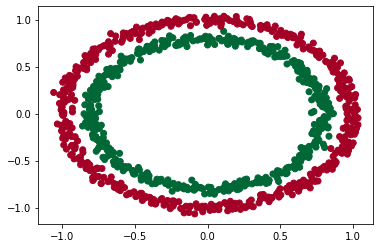

In [17]:
#vizualise with a plot
plt.scatter(circles['X0'], circles['X1'], c=circles['label'], cmap=plt.cm.RdYlGn)

## Inpout and output shapes

In [18]:
#check the features and label shapes
X.shape, y.shape

((1000, 2), (1000,))

In [19]:
#how many samples 
len(X), len(y)

(1000, 1000)

In [22]:
#view the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling

In [31]:
#set the random seed
tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
                            tf.keras.Input(shape=(1000,2)),
                            tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [32]:
#let'e try to run the model much longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y) #wrong cos we are using same of training data as test

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [51]:
#Add another layer and run much longer
#set the random seed
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
                            tf.keras.Input(shape=(1000,2)),
                            tf.keras.layers.Dense(100, activation = 'relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.003), metrics=['accuracy'])

model_2.fit(X, y, epochs=200, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [53]:
X_res, y_res = model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 3.2508e-04 - accuracy: 1.0000


In [46]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1000, 100)         300       
_________________________________________________________________
dense_24 (Dense)             (None, 1000, 50)          5050      
_________________________________________________________________
dense_25 (Dense)             (None, 1000, 1)           51        
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________


In [54]:
plt.scatter(X_res[0], X_res[1], c=y_res, cmap=plt.cm.BrBG)

TypeError: ignored

In [72]:
import numpy as np


def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


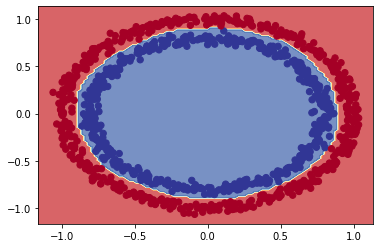

In [73]:
plot_decision_boundary(model_2, X, y)